In [16]:
import numpy as np
from scipy.stats import uniform
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

In [17]:
def proposal_dist(new_sample, curr_sample, cov):
    return multivariate_normal.pdf(new_sample, curr_sample , cov)

In [18]:
def gaussian_pdf(curr_sample):
    mean = [4, 4]
    cov = [[1, 0.8],[0.8, 1]]
    return multivariate_normal.pdf(curr_sample, mean, cov)

In [19]:
def mh_sampling(proposal_var, num_samples):
    current_sample = [0, 0]
    samples = []  
    num_rejections = 0
    for i in range (1, num_samples):

        candidate_sample = np.random.multivariate_normal(current_sample, np.array([[proposal_var, 0], [0 , proposal_var]]))  # New Candidate Sample
        
        u = uniform.rvs() # Uniform Random Variable
        A = min(1, gaussian_pdf(candidate_sample)/gaussian_pdf(current_sample)) # Acceptance Probability

        if u < A:
            current_sample = candidate_sample # Accept Candidate Sample
        else:
            num_rejections += 1 # Reject Candidate Sample
            
        samples.append(current_sample) # Add Sample to Samples List

        if i + 1 in [100, 1000, 10000]:

            print("Rejection Rate for {} samples: {}".format(i + 1, num_rejections/(i + 1))) # Print Rejection Rate

            samples_plot = np.array(samples)
            sample_mean = np.mean(samples_plot, axis=0) # Mean of Samples
            centered_samples = samples_plot - sample_mean
            sample_cov = (1/samples_plot.shape[0]) * np.dot(centered_samples.T, centered_samples) # Covariance of Samples

            plt.figure(figsize=(10,10))
            x, y = np.mgrid[-5:10:.01, -2:8:.01]
            pos = np.dstack((x, y))

            plt.plot(samples_plot[:, 0], samples_plot[:, 1], color="red", linewidth=1)
            custom_lines = [Line2D([0], [0], color="blue", lw=2),
                            Line2D([0], [0], color="green", lw=2),
                            Line2D([0], [0], color="red", lw=2)]
            plt.contour(x, y, gaussian_pdf(pos), levels=[0.03], colors="blue", linewidths=3)
            plt.contour(x, y, proposal_dist(pos, sample_mean, sample_cov), levels=[0.03], colors="green", linewidths=3)
            plt.legend(custom_lines, ['p(z)', 'p_hat(z)', 'samples'])
            
            plt.title( "Samples:" + str(i + 1) + " Var:" + str(proposal_var))
            plt.savefig("Samples:" + str(i+1) + ",Var:" + str(proposal_var) +'.png')
            # plt.show()

    return num_rejections/num_samples

Proposal Variance: 0.01
Rejection Rate for 100 samples: 0.12
Rejection Rate for 1000 samples: 0.099
Rejection Rate for 10000 samples: 0.0845
Proposal Variance: 1.0
Rejection Rate for 100 samples: 0.56
Rejection Rate for 1000 samples: 0.606
Rejection Rate for 10000 samples: 0.5939
Proposal Variance: 100.0
Rejection Rate for 100 samples: 0.93
Rejection Rate for 1000 samples: 0.984
Rejection Rate for 10000 samples: 0.9906


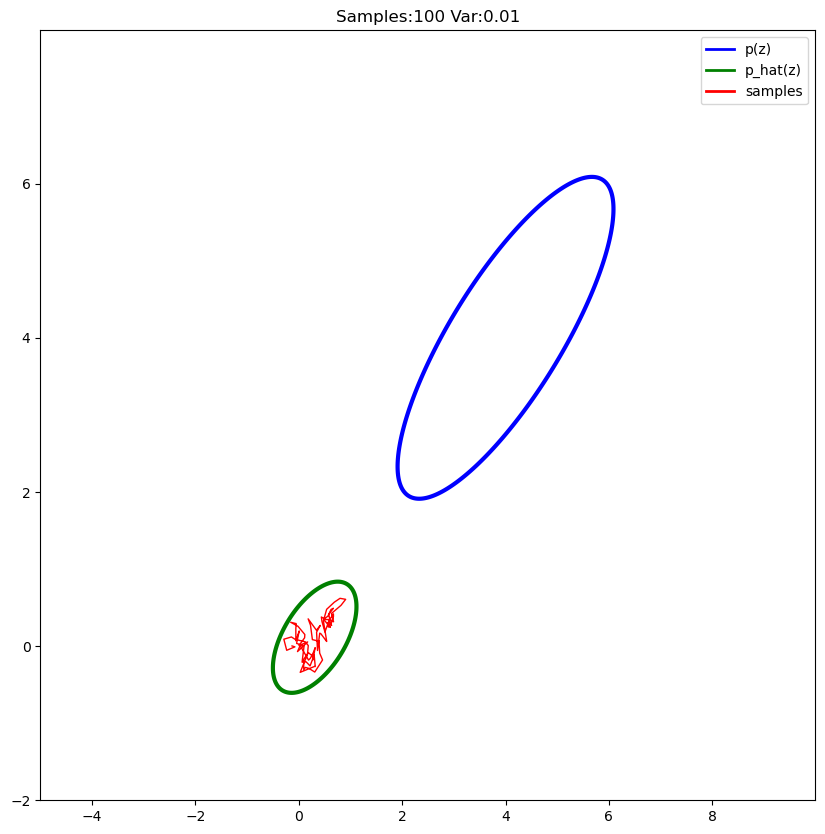

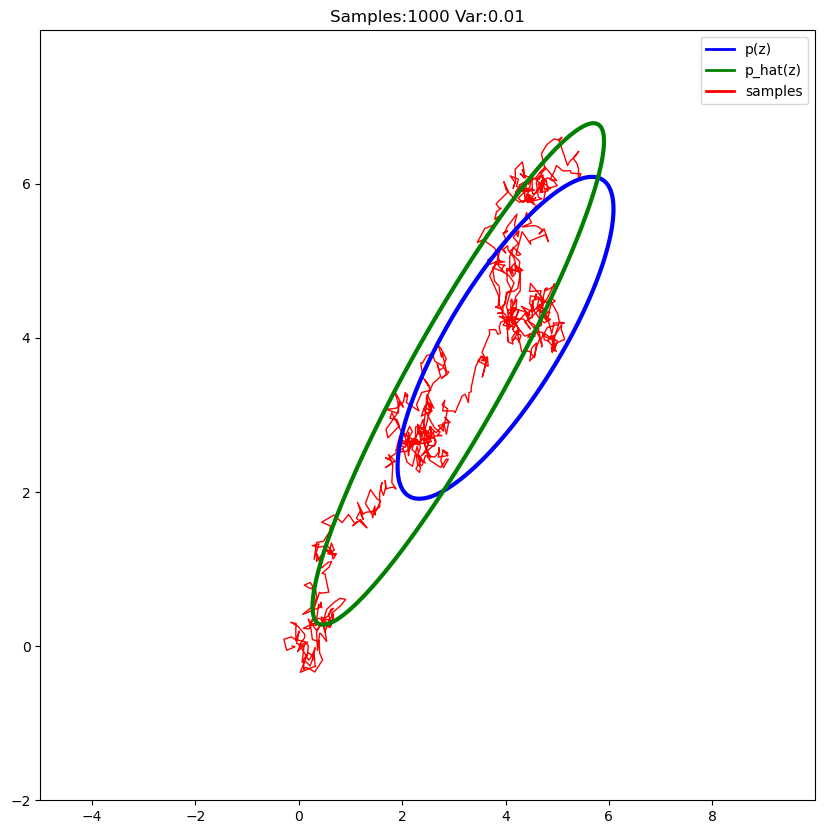

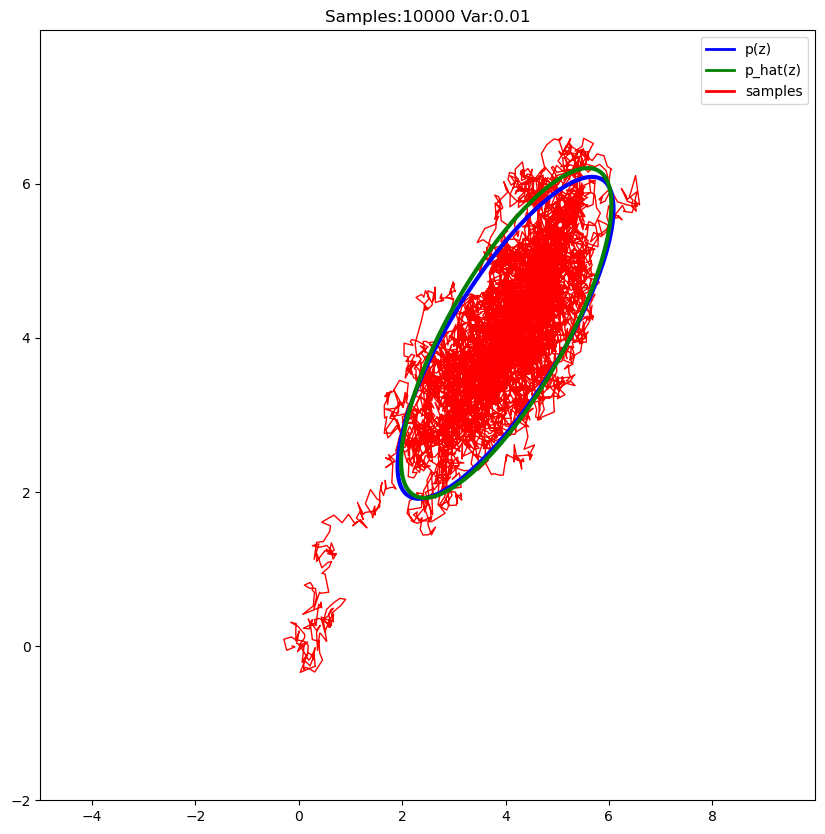

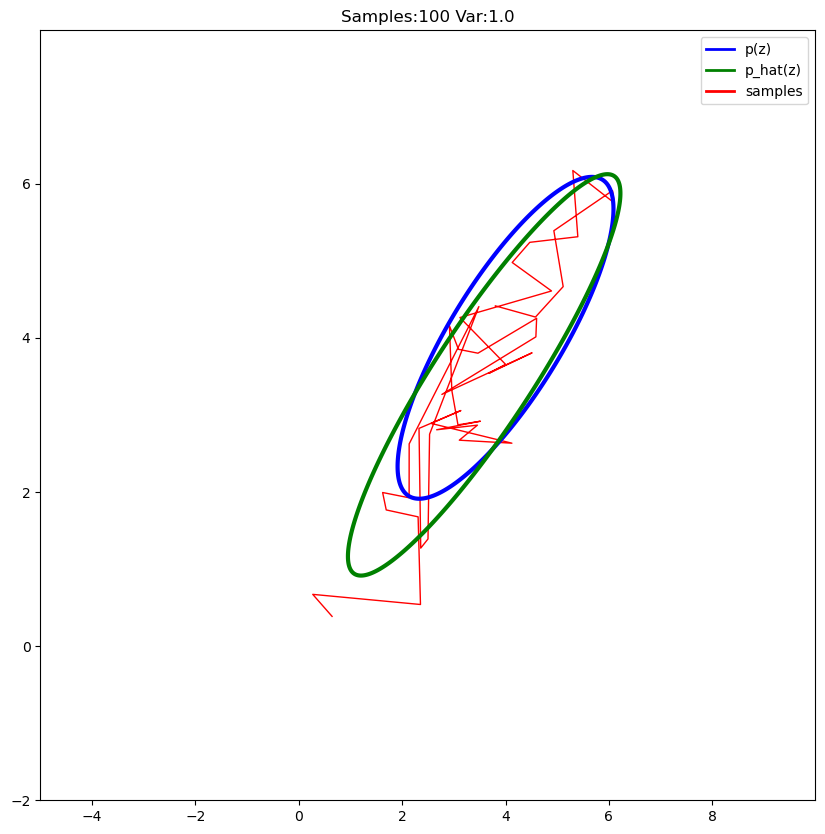

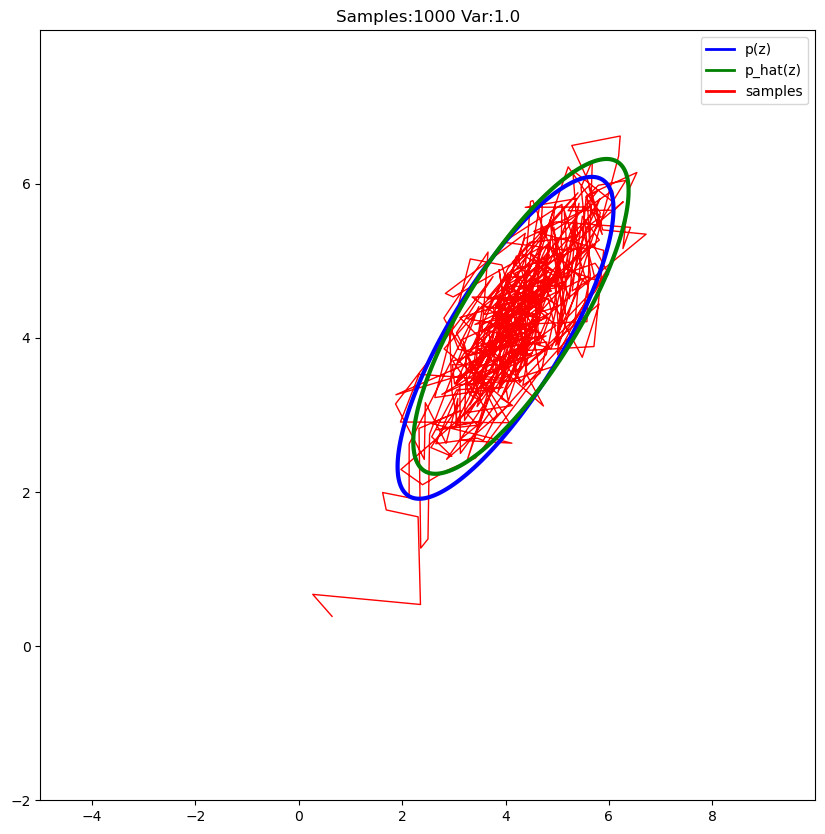

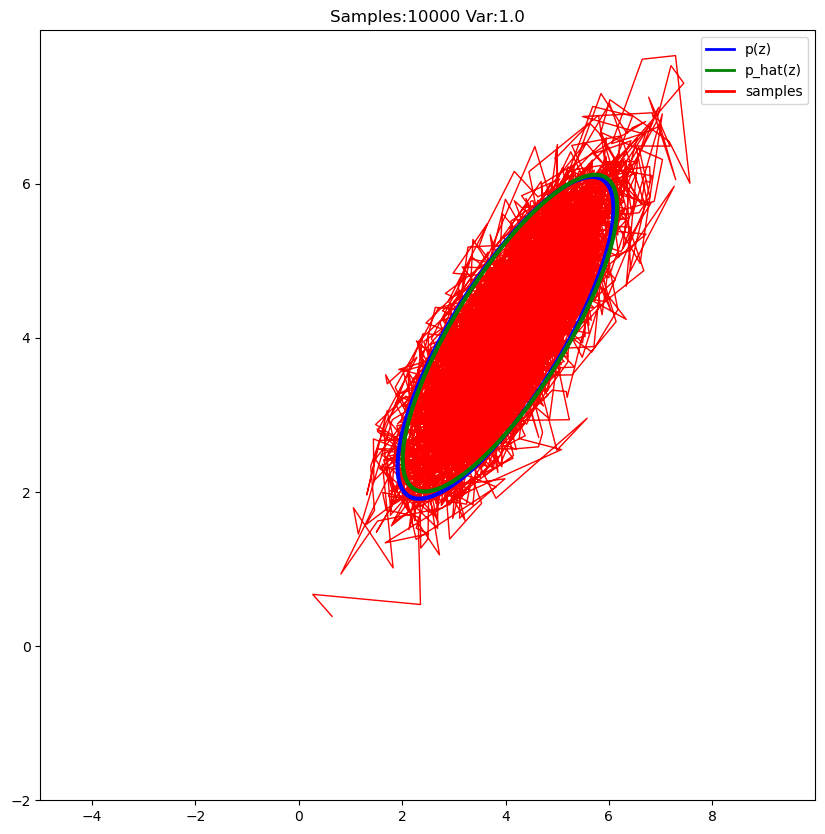

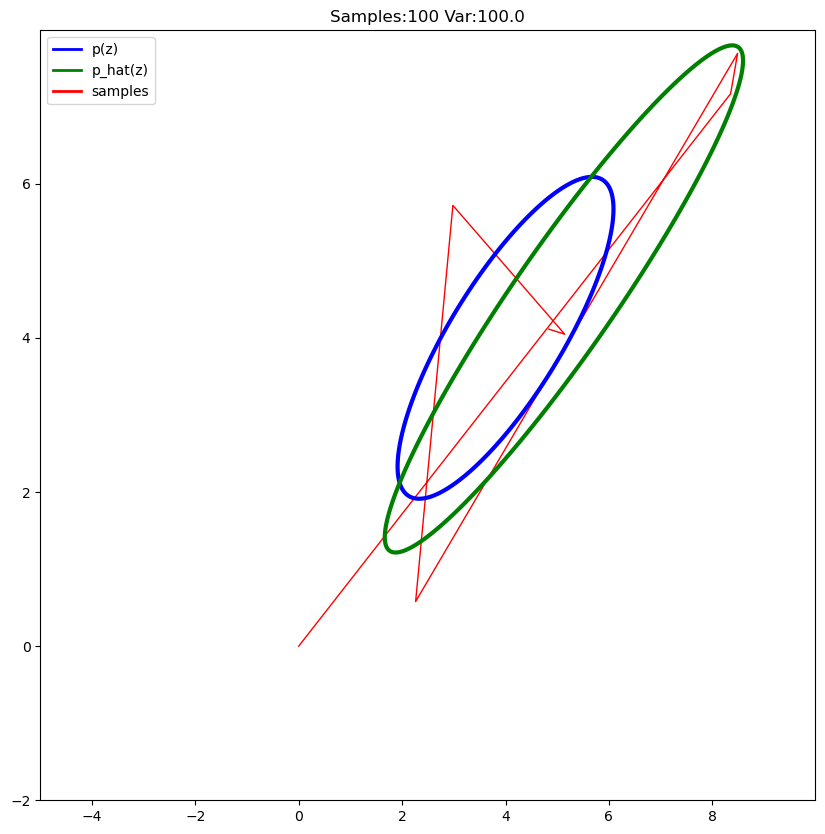

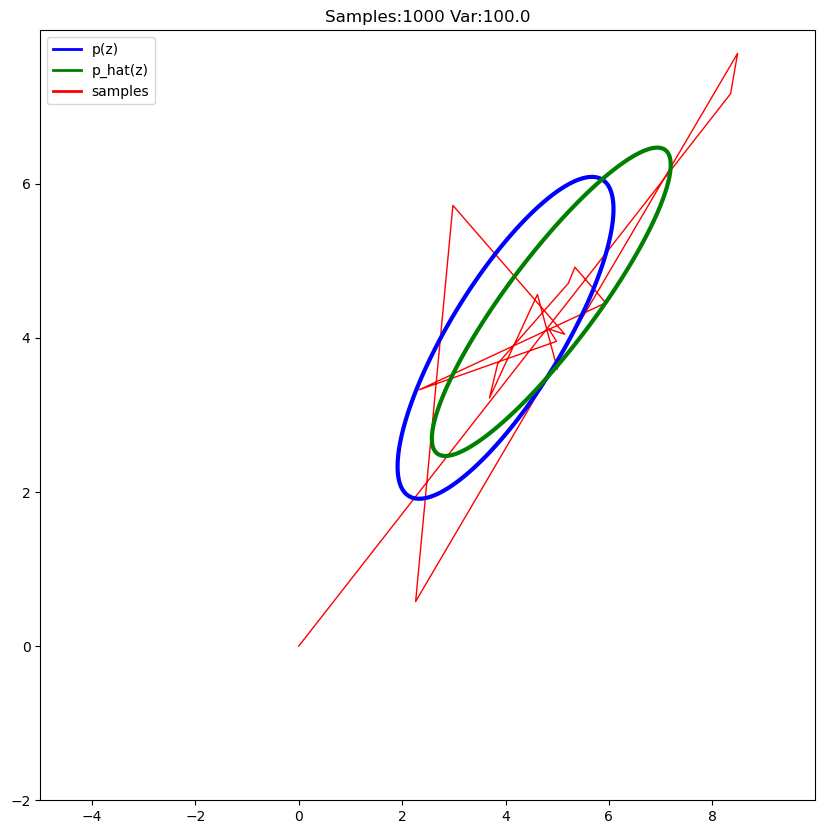

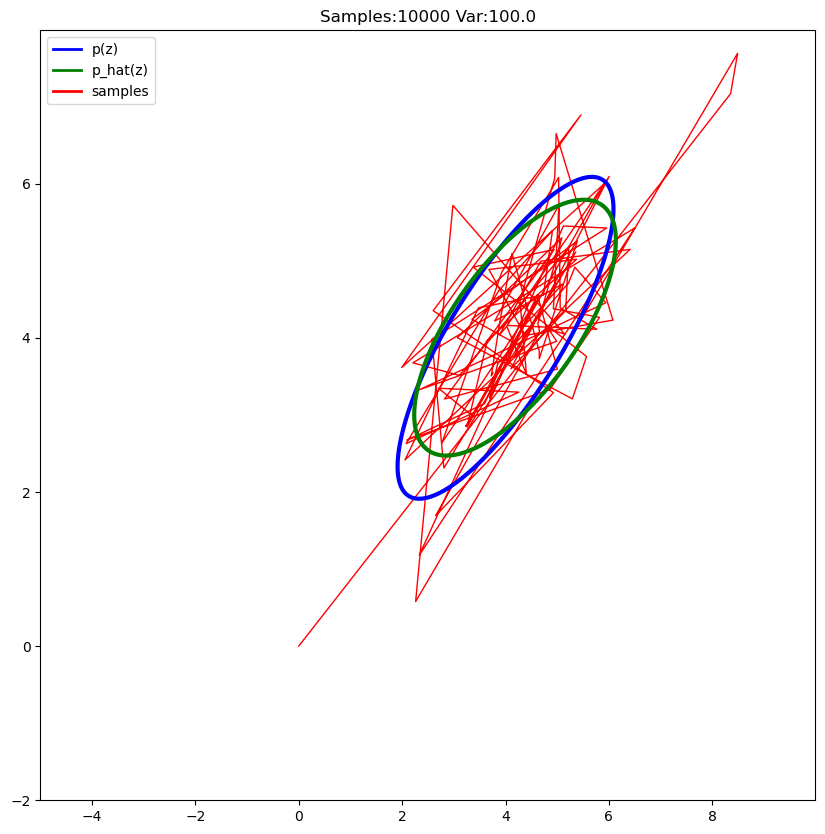

In [20]:
proposal_vars = [0.01, 1.0, 100.0]
# proposal_vars = [0.01]
for proposal_var in proposal_vars: 
    print("Proposal Variance: {}".format(proposal_var))
    rej_rate = mh_sampling(proposal_var, 10000) # MH Sampling